# MoonLight Energy Solutions Data Analysis

In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

#### Load the data

In [118]:
benin_data = pd.read_csv('../data/benin-malanville.csv')
sierraleon_data = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_data = pd.read_csv('../data/togo-dapaong_qc.csv')

### 1. Benin Site

* Lets explore the data

In [4]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
benin_data.shape

(525600, 19)

In [6]:
benin_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Check for null values

In [7]:
benin_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Remove the comment column

In [8]:
benin_data.drop('Comments', axis=1, inplace=True)
benin_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

##### Data Exploration for Benin

In [9]:
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [10]:
benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


Fixing the incorrect negative values of GHI, DNI & DHI

In [85]:
benin_clean_data = benin_data[(benin_data['GHI'] >= 0) & (benin_data['DNI'] >= 0) & (benin_data['DHI'] >=0)]
benin_clean_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,0.0
mean,513.411100,356.480524,247.397346,501.775502,485.418619,31.271940,45.541173,2.802063,3.722219,0.587311,160.361394,11.926945,994.126139,0.001956,0.000860,47.396643,42.229899,NaN
std,304.765569,279.731019,143.420836,307.789277,298.429501,5.459802,27.015814,1.540762,1.898862,0.249724,95.546187,6.249953,2.637058,0.044188,0.030041,12.496610,10.599677,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.500000,8.400000,NaN
25%,239.000000,61.200000,141.200000,218.800000,211.800000,27.700000,18.800000,1.700000,2.400000,0.400000,76.500000,8.500000,992.000000,0.000000,0.000000,38.800000,34.900000,NaN
50%,520.300000,352.250000,227.800000,502.100000,484.900000,31.500000,44.600000,2.700000,3.600000,0.600000,161.300000,11.400000,994.000000,0.000000,0.000000,48.000000,42.400000,NaN
75%,790.000000,605.300000,336.200000,786.400000,757.700000,35.400000,68.100000,3.800000,4.900000,0.700000,240.900000,14.700000,996.000000,0.000000,0.000000,56.500000,49.600000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,16.000000,22.300000,3.400000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Count unique Cleaning values

In [82]:
benin_clean_data['Cleaning'].value_counts()

Cleaning
0    246395
1       483
Name: count, dtype: int64

##### Checking for outliers

<Axes: >

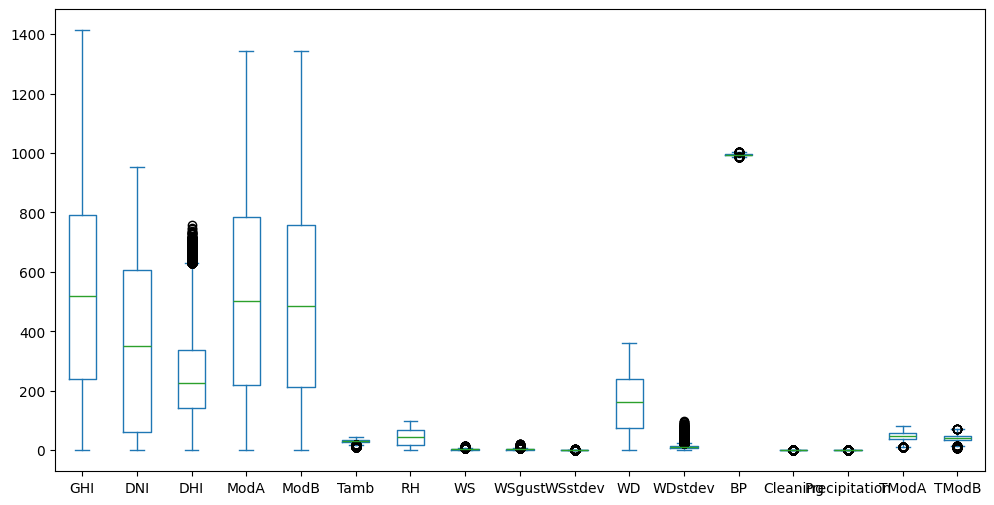

In [14]:
benin_clean_data.plot(kind='box', figsize=(12, 6))

Text(0.5, 1.0, 'Boxplot for ModA and ModB')

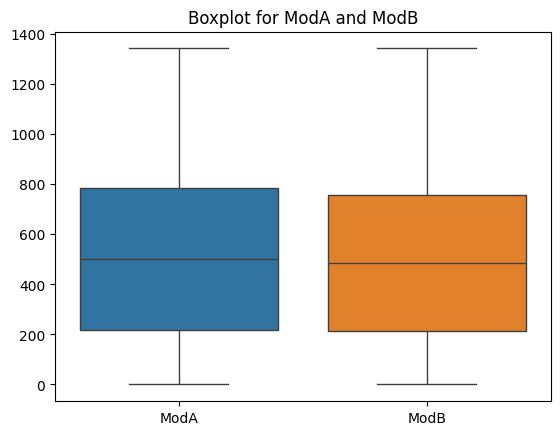

In [15]:
sns.boxplot(data=benin_clean_data[['ModA', 'ModB']])
plt.title("Boxplot for ModA and ModB")

Text(0.5, 1.0, 'Boxplot for WS and WSgust')

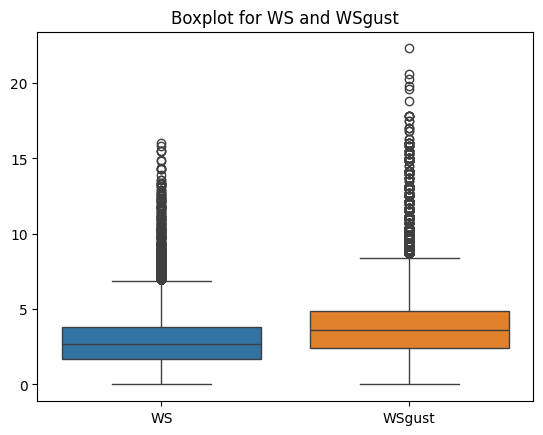

In [16]:
sns.boxplot(data=benin_clean_data[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust")

In [17]:
Q1 = benin_clean_data[['WS', 'WSgust']].quantile(0.25)
Q3 = benin_clean_data[['WS', 'WSgust']].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the data
beini_df_capped = benin_clean_data.copy()
beini_df_capped[['WS', 'WSgust']] = benin_clean_data[['WS', 'WSgust']].clip(lower=lower_bound, upper=upper_bound, axis=1)


Text(0.5, 1.0, 'Boxplot for WS and WSgust After removing outliers')

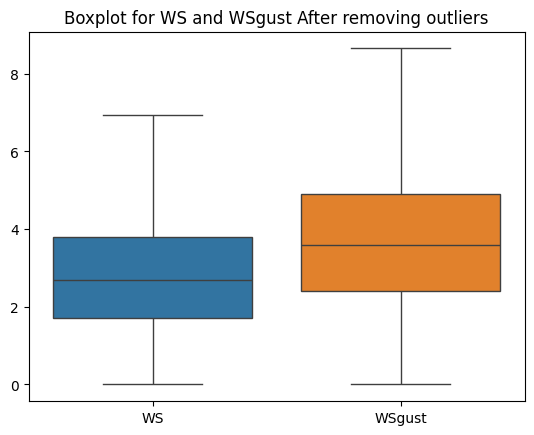

In [19]:
sns.boxplot(data=beini_df_capped[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust After removing outliers")

Understanding the data distribution with histograms

array([[<Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'DNI'}>,
        <Axes: title={'center': 'DHI'}>],
       [<Axes: title={'center': 'ModA'}>,
        <Axes: title={'center': 'ModB'}>,
        <Axes: title={'center': 'Tamb'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'WS'}>,
        <Axes: title={'center': 'WSgust'}>,
        <Axes: title={'center': 'WSstdev'}>,
        <Axes: title={'center': 'WD'}>],
       [<Axes: title={'center': 'WDstdev'}>,
        <Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cleaning'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'TModA'}>,
        <Axes: title={'center': 'TModB'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

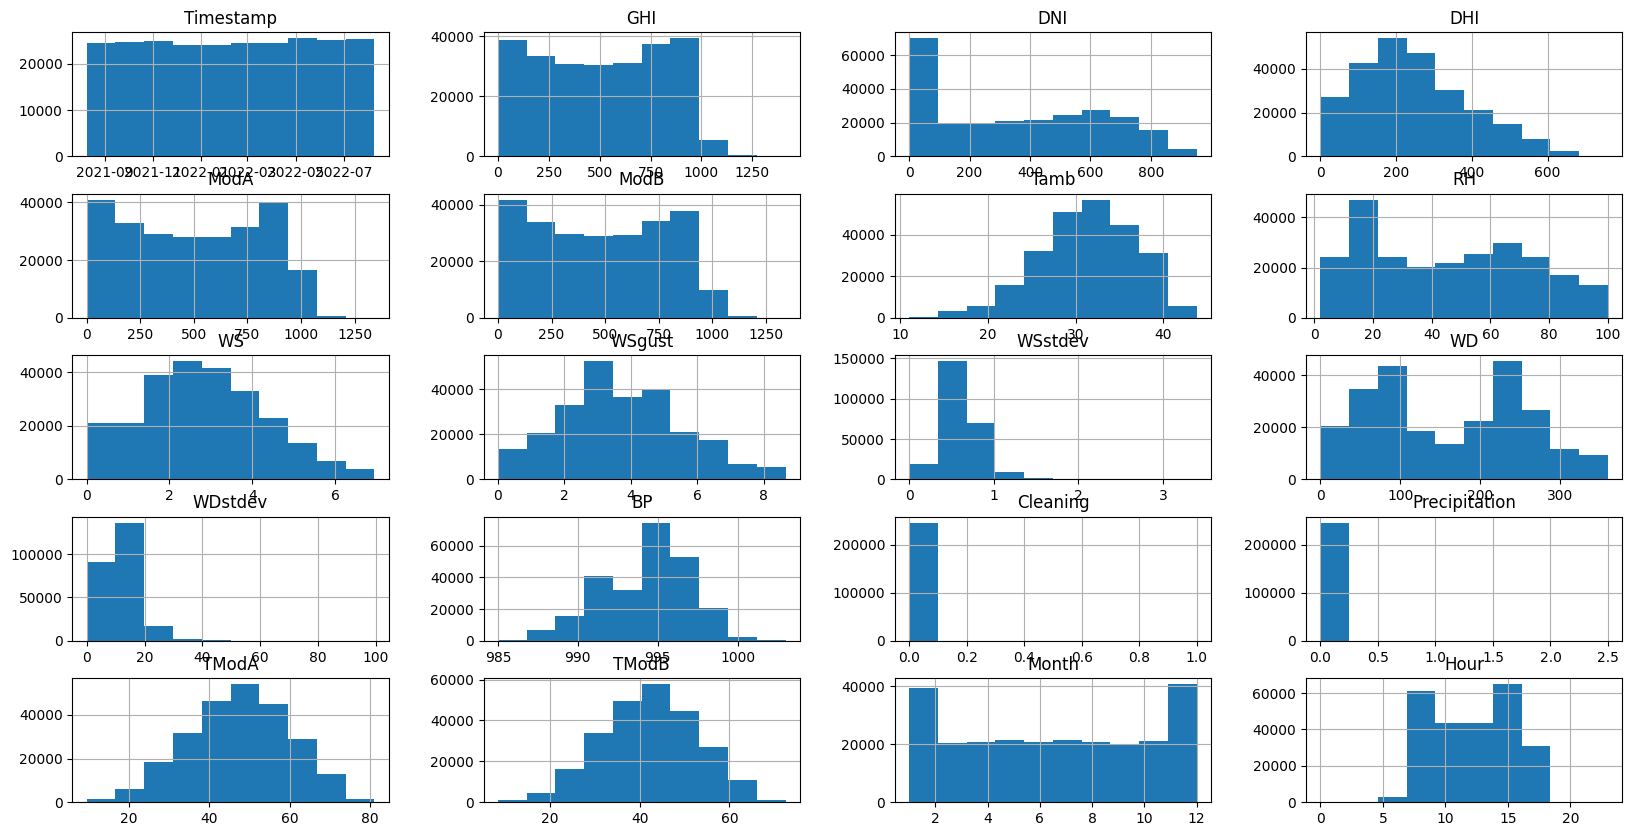

In [129]:
beini_df_capped.hist(figsize=(20,10))

##### Time Series analysis

In [42]:

beini_df_capped['Timestamp'] = pd.to_datetime(beini_df_capped['Timestamp'])

# Extract month, day, and hour
beini_df_capped['Month'] = beini_df_capped['Timestamp'].dt.month
beini_df_capped['Hour'] = beini_df_capped['Timestamp'].dt.hour
beini_df_capped['Date'] = beini_df_capped['Timestamp'].dt.date


Montly Pattern of GHI, DNI, DHI & Tamb

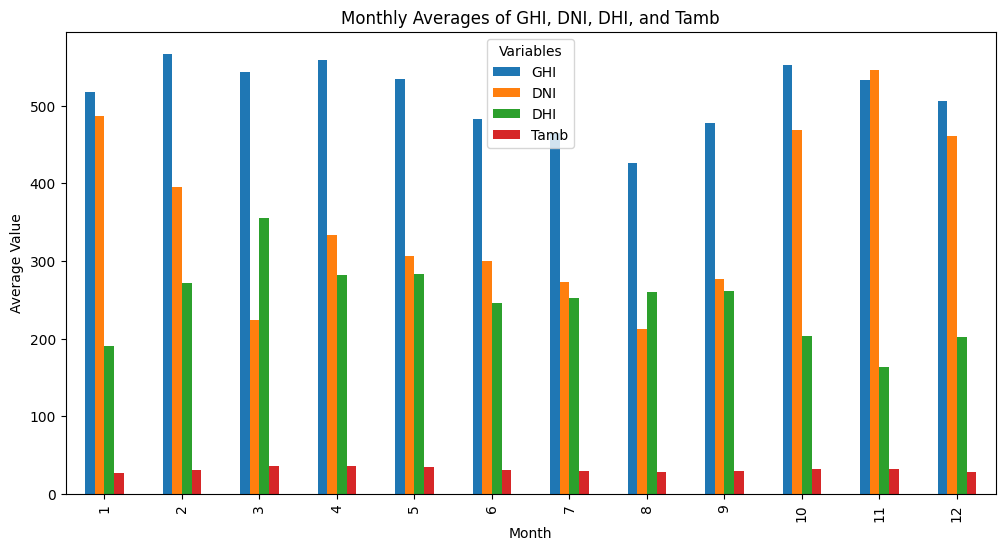

In [41]:
monthly_data = beini_df_capped.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_data.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(title="Variables")
plt.show()


Hourly Pattern of GHI, DNI, DHI & Tamb

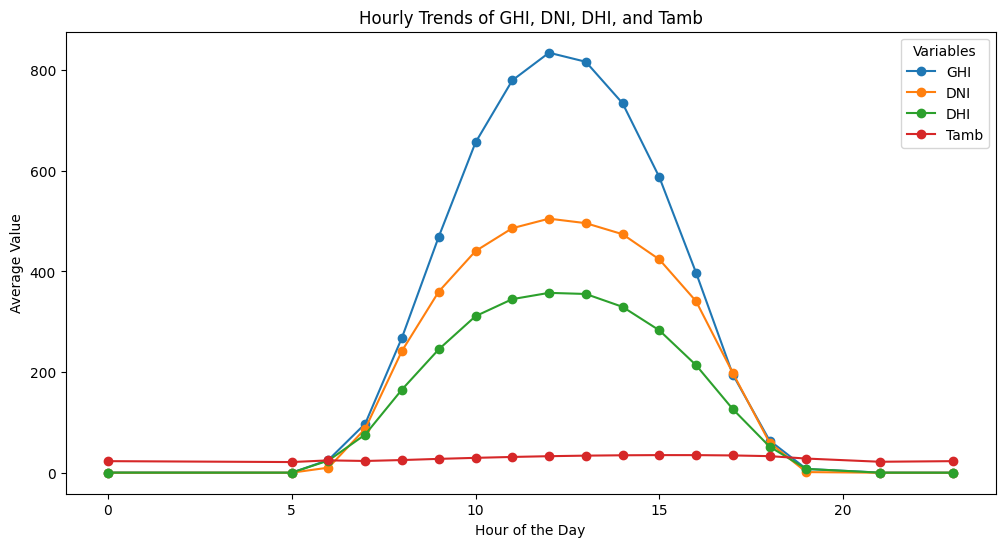

In [43]:
hourly_data = beini_df_capped.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Hourly Trends of GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.legend(title="Variables")
plt.show()


Effect of cleaning on ModA

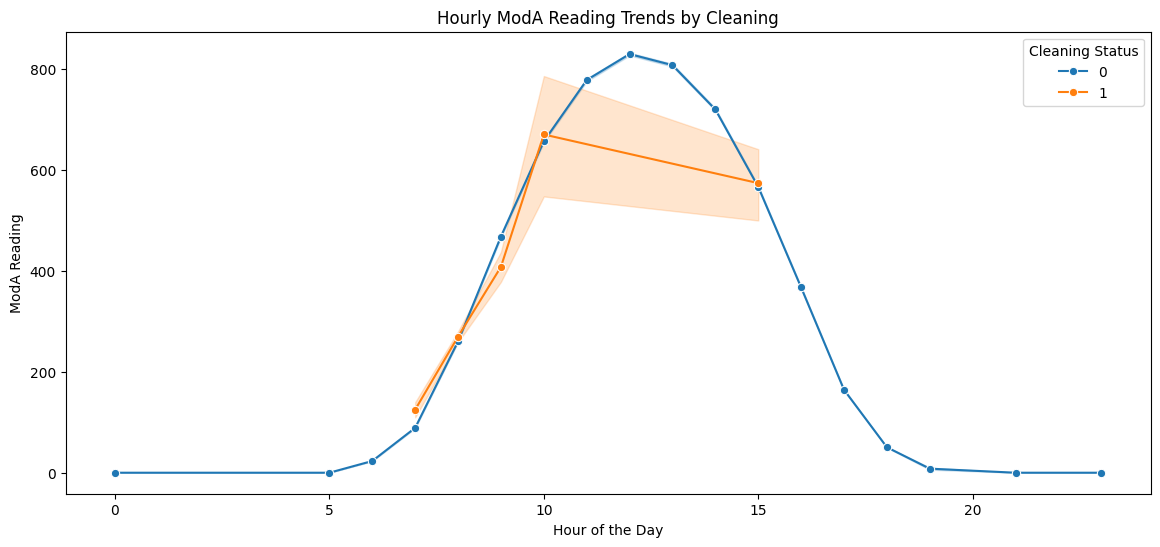

In [35]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=beini_df_capped, x='Hour', y='ModA', hue='Cleaning', marker='o')
plt.title('Hourly ModA Reading Trends by Cleaning')
plt.xlabel('Hour of the Day')
plt.ylabel('ModA Reading')
plt.legend(title="Cleaning Status")
plt.show()


Effect of cleaning on ModB

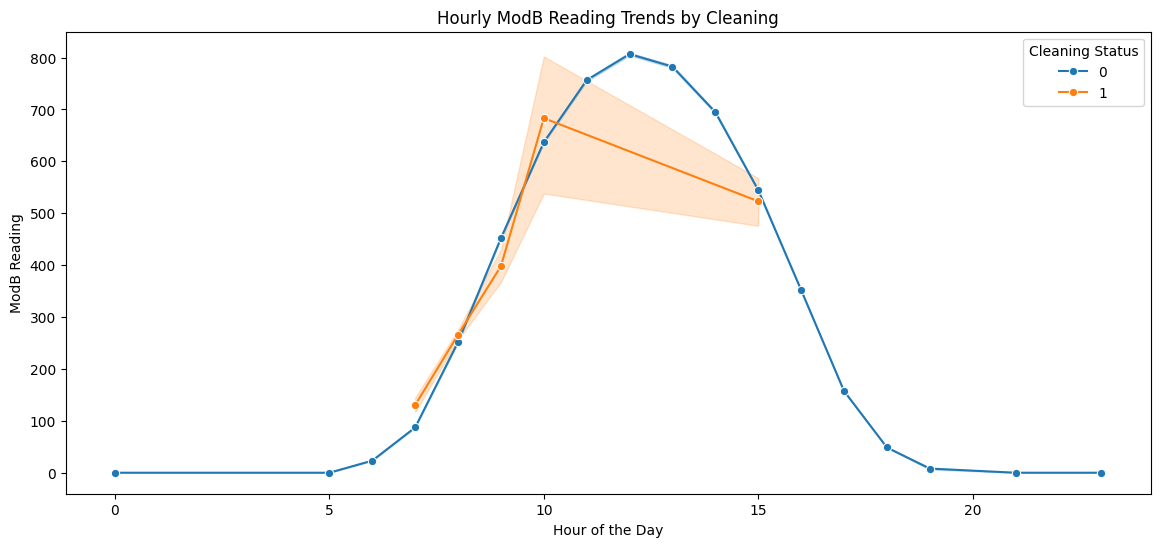

In [36]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=beini_df_capped, x='Hour', y='ModB', hue='Cleaning', marker='o')
plt.title('Hourly ModB Reading Trends by Cleaning')
plt.xlabel('Hour of the Day')
plt.ylabel('ModB Reading')
plt.legend(title="Cleaning Status")
plt.show()


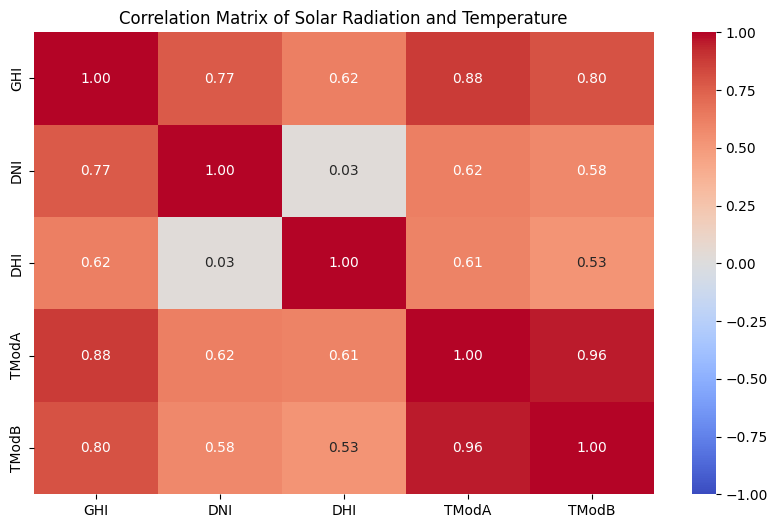

In [44]:
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

corr_matrix = beini_df_capped[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Solar Radiation and Temperature')
plt.show()

Wind Analysis

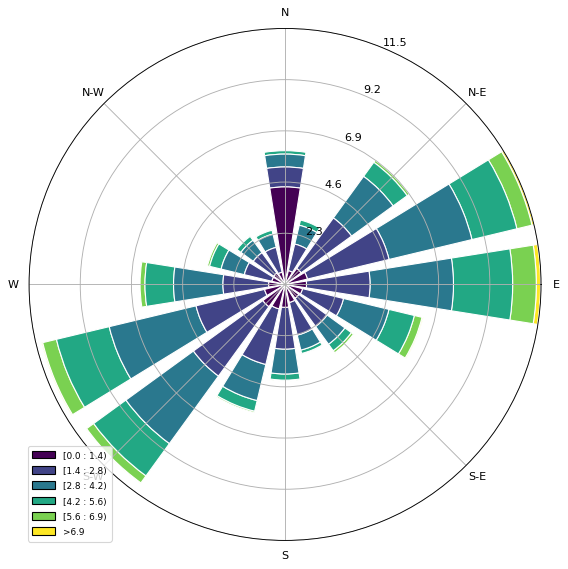

In [60]:
ax = WindroseAxes.from_ax()
ax.bar(beini_df_capped['WD'], beini_df_capped['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

Tempreture analysis

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.495461 -0.311479 -0.351069 -0.137887
Tamb -0.495461  1.000000  0.414207  0.287826  0.296023
GHI  -0.311479  0.414207  1.000000  0.767136  0.617398
DNI  -0.351069  0.287826  0.767136  1.000000  0.029839
DHI  -0.137887  0.296023  0.617398  0.029839  1.000000


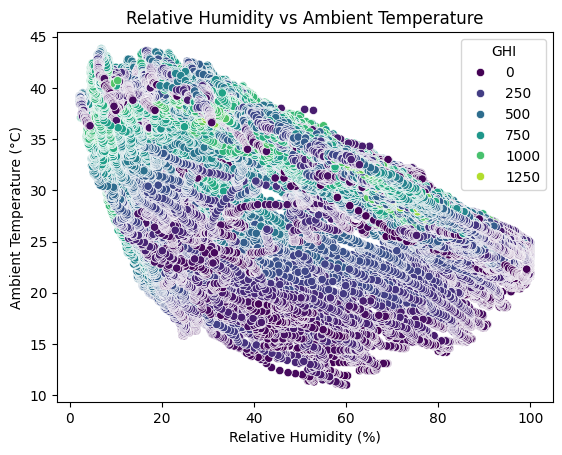

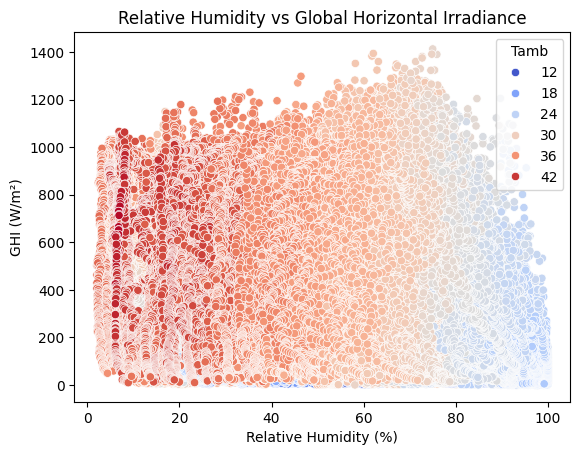

In [64]:
correlation = beini_df_capped[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()
print(correlation)

sns.scatterplot(x=beini_df_capped['RH'], y=beini_df_capped['Tamb'], hue=beini_df_capped['GHI'], palette='viridis')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

sns.scatterplot(x=beini_df_capped['RH'], y=beini_df_capped['GHI'], hue=beini_df_capped['Tamb'], palette='coolwarm')
plt.title('Relative Humidity vs Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()

Relative Humidity vs Ambient Temperature: There appears to be a negative correlation between relative humidity and ambient temperature. This means that as the ambient temperature increases, the relative humidity tends to decrease. This is because warm air can hold more moisture than cold air. So, at a higher temperature, the same amount of moisture will result in a lower relative humidity.

But for Relative Humidity vs Global Horizontal Irradiance (GHI):  The correlation between relative humidity and GHI does not appear to be a strong positive or negative correlation.

In [ ]:
def calculate_z_scores(df, threshold=3):
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        z_scores = (df[column] - mean) / std_dev
        df[f'{column}_outlier'] = np.abs(z_scores) > threshold
    return df

df_with_flags = calculate_z_scores(beini_df_capped)

print(df_with_flags.head())

              Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
413 2021-08-09 06:54:00  16.7  0.0  16.5  16.1  16.3  24.2  98.8  0.0     0.0   
414 2021-08-09 06:55:00  18.2  0.1  18.0  17.4  17.6  24.2  98.8  0.0     0.0   
415 2021-08-09 06:56:00  19.7  0.3  19.5  18.7  18.9  24.2  98.8  0.0     0.0   
416 2021-08-09 06:57:00  21.1  0.6  20.9  19.9  20.1  24.2  98.9  0.0     0.0   
417 2021-08-09 06:58:00  22.5  1.1  22.2  21.1  21.3  24.2  98.9  0.0     0.0   

     ...  WSstdev_outlier  WD_outlier  WDstdev_outlier  BP_outlier  \
413  ...            False       False            False       False   
414  ...            False       False            False       False   
415  ...            False       False            False       False   
416  ...            False       False            False       False   
417  ...            False       False            False       False   

     Cleaning_outlier  Precipitation_outlier  TModA_outlier  TModB_outlier  \
413           

Bubble Chart

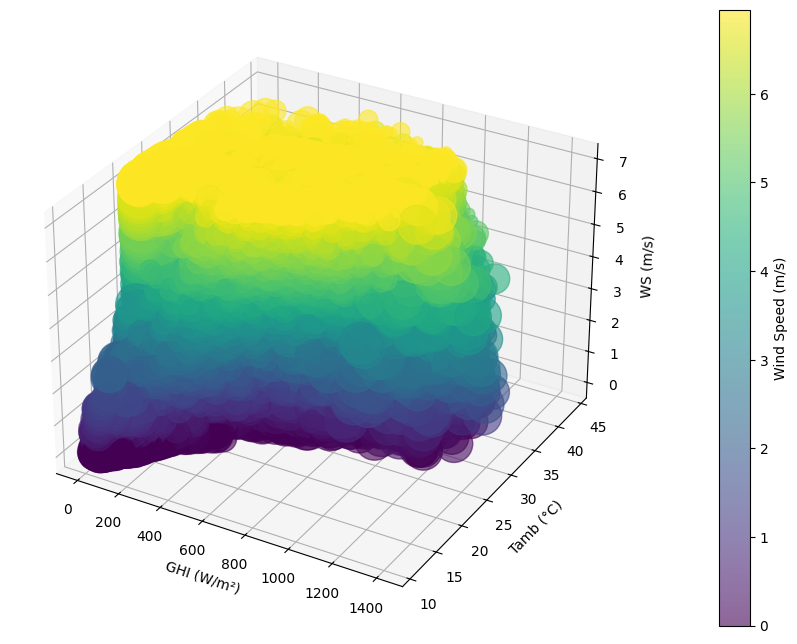

In [109]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    beini_df_capped['GHI'], beini_df_capped['Tamb'], beini_df_capped['WS'],
    s=beini_df_capped['RH']*10,  
    c=beini_df_capped['WS'],     
    cmap='viridis',  
    alpha=0.6     
)

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Wind Speed (m/s)')

ax.set_xlabel('GHI (W/m²)')
ax.set_ylabel('Tamb (°C)')
ax.set_zlabel('WS (m/s)')

plt.show()


Overall Relationship:

There appears to be a positive correlation between GHI (Global Horizontal Irradiance) and Tamb (Ambient Temperature). This means that as GHI increases, Tamb also tends to increase. This makes sense, as higher solar radiation generally leads to higher temperatures.
Impact of Wind Speed (WS):

The color of the bubbles, representing wind speed, suggests that there is a wide range of wind speeds present in the data.
There doesn't seem to be a strong correlation between wind speed and the other variables. However, in some regions of the plot, we can see that higher wind speeds might be associated with lower temperatures. This could be due to the cooling effect of wind.
Impact of Relative Humidity (RH):

The size of the bubbles represents relative humidity (RH). While the plot doesn't explicitly show a strong correlation between RH and the other variables, we can make some inferences:
Larger bubbles (higher RH) seem to be more concentrated in areas with lower GHI and Tamb. This suggests that higher humidity might be associated with lower temperatures and less solar radiation. This could be due to factors like cloud cover or increased atmospheric moisture.

### 2. Togo Site

Data Exploration

In [72]:
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [73]:
togo_data.shape

(525600, 19)

Checking for null values

In [75]:
togo_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Dropping comments column since it is full of null values

In [76]:
togo_data.drop('Comments', axis=1, inplace=True)
togo_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [77]:
togo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [78]:
togo_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


Fixing data inconsistency by removing negative values from GHI, DNI & DHI

In [87]:
togo_clean_data = togo_data[(togo_data['GHI'] >= 0) & (togo_data['DNI'] >= 0) & (togo_data['DHI'] >=0)]
togo_clean_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000,268215.000000
mean,454.081218,296.409415,228.166180,443.109538,430.224900,29.868625,50.954453,2.897560,3.951753,0.650577,171.400294,13.115981,975.956483,0.001048,0.001600,39.984648,42.444731
std,319.096010,283.534417,150.064955,318.155810,308.539523,4.825459,27.871583,1.474324,1.850927,0.265139,89.270858,5.635309,2.341965,0.032351,0.029865,10.425510,12.060518
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.700000,13.400000
25%,156.500000,7.000000,112.400000,144.200000,140.700000,26.400000,22.800000,1.900000,2.600000,0.500000,83.200000,10.000000,975.000000,0.000000,0.000000,31.900000,33.000000
50%,430.300000,233.800000,211.400000,410.800000,399.800000,29.900000,55.200000,2.800000,3.900000,0.600000,202.800000,12.900000,976.000000,0.000000,0.000000,40.300000,42.600000
75%,743.900000,548.000000,330.300000,733.400000,710.400000,33.500000,74.600000,3.800000,5.200000,0.800000,240.700000,16.000000,978.000000,0.000000,0.000000,47.800000,51.400000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,22.900000,4.400000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


Counting number of cleaned and uncleaned modules

In [88]:
togo_clean_data['Cleaning'].value_counts()

Cleaning
0    267934
1       281
Name: count, dtype: int64

Checking for outliers in the data

<Axes: >

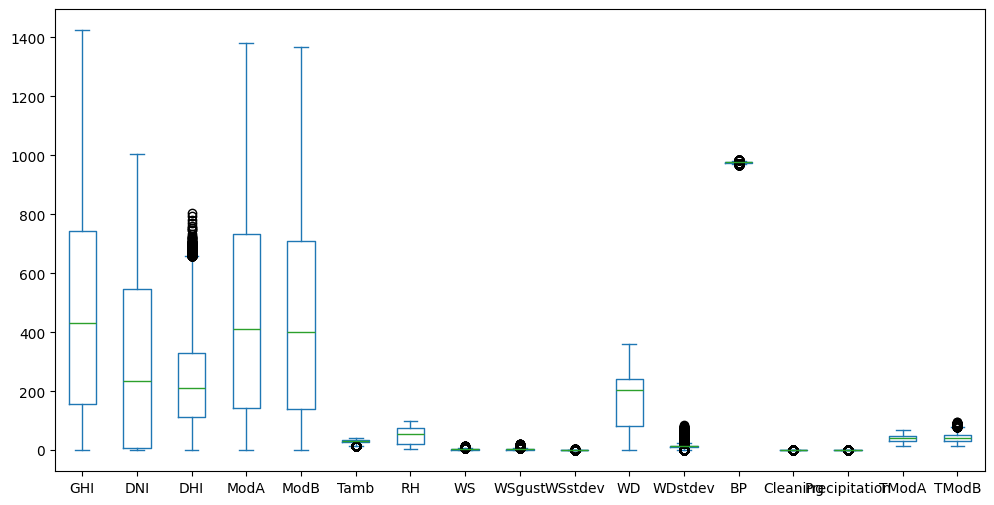

In [90]:
togo_clean_data.plot(kind='box', figsize=(12,6))

Text(0.5, 1.0, 'Boxplot for ModA and ModB')

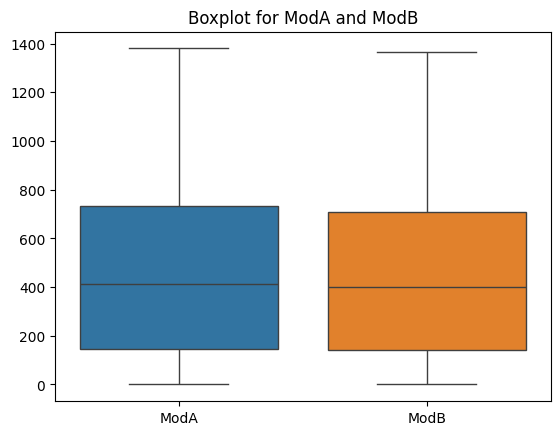

In [91]:
sns.boxplot(data=togo_clean_data[['ModA', 'ModB']])
plt.title("Boxplot for ModA and ModB")

Text(0.5, 1.0, 'Boxplot for WS and WSgust')

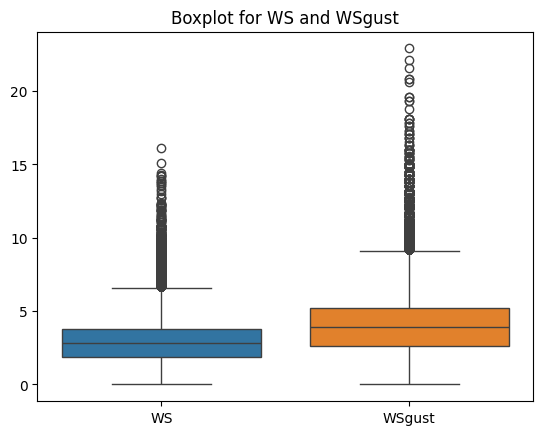

In [92]:
sns.boxplot(data=togo_clean_data[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust")

In [94]:
Q1 = togo_clean_data[['WS', 'WSgust']].quantile(0.25)
Q3 = togo_clean_data[['WS', 'WSgust']].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the data
togo_df_capped = togo_clean_data.copy()
togo_df_capped[['WS', 'WSgust']] = togo_clean_data[['WS', 'WSgust']].clip(lower=lower_bound, upper=upper_bound, axis=1)


Text(0.5, 1.0, 'Boxplot for WS and WSgust After removing outliers')

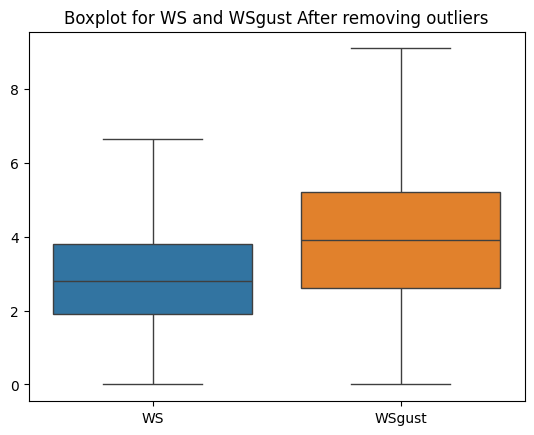

In [95]:
sns.boxplot(data=togo_df_capped[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust After removing outliers")

Understanding the data distribution with histograms

array([[<Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'DNI'}>,
        <Axes: title={'center': 'DHI'}>],
       [<Axes: title={'center': 'ModA'}>,
        <Axes: title={'center': 'ModB'}>,
        <Axes: title={'center': 'Tamb'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'WS'}>,
        <Axes: title={'center': 'WSgust'}>,
        <Axes: title={'center': 'WSstdev'}>,
        <Axes: title={'center': 'WD'}>],
       [<Axes: title={'center': 'WDstdev'}>,
        <Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cleaning'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'TModA'}>,
        <Axes: title={'center': 'TModB'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

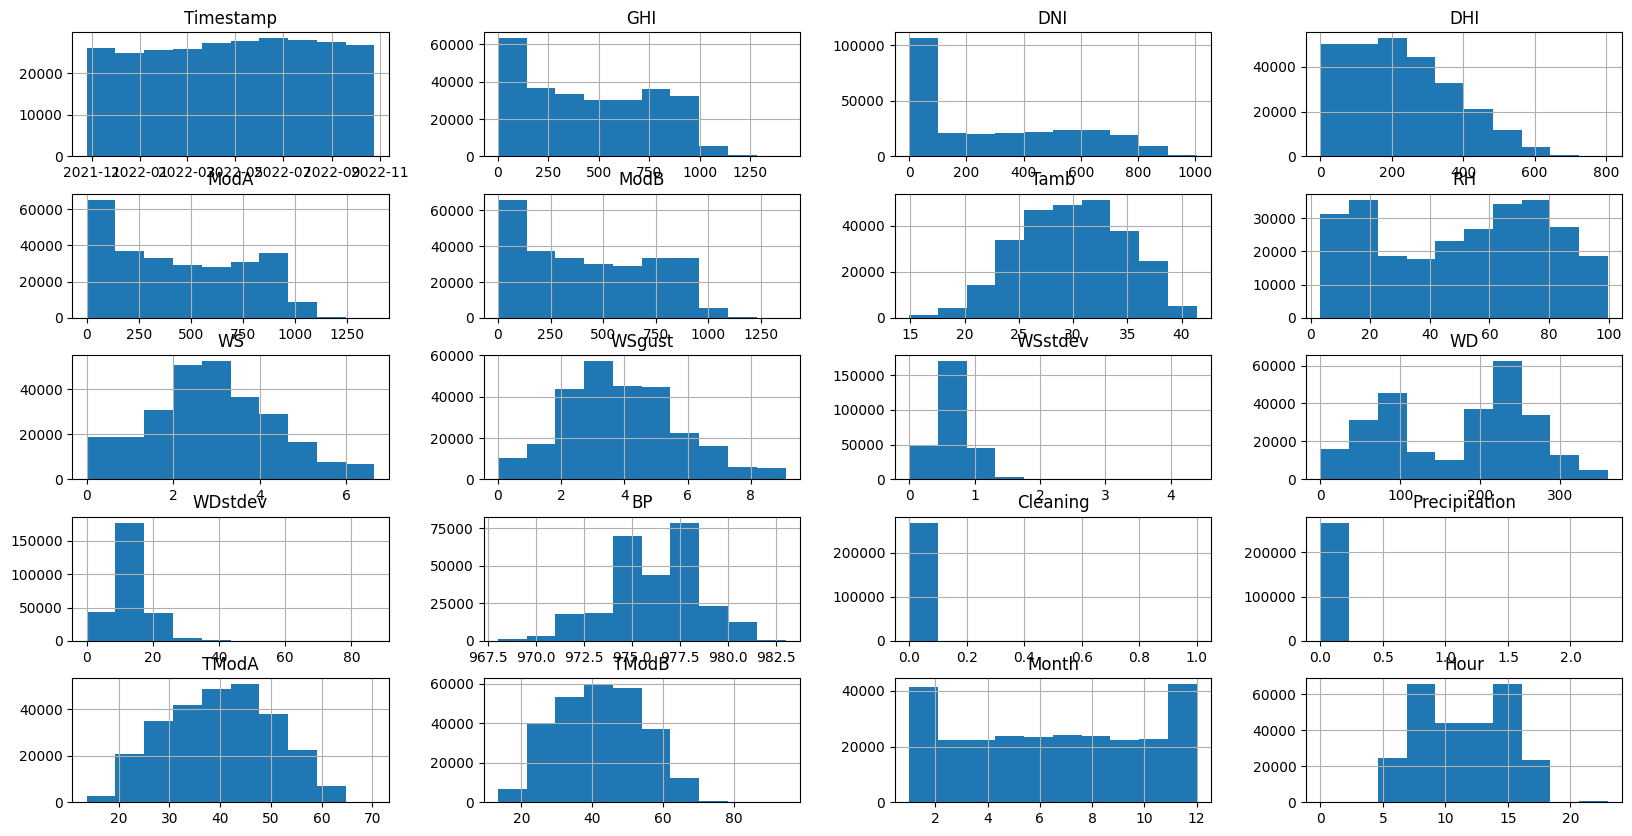

In [128]:
togo_df_capped.hist(figsize=(20,10))

##### Time Series analysis

In [96]:

togo_df_capped['Timestamp'] = pd.to_datetime(togo_df_capped['Timestamp'])

# Extract month, day, and hour
togo_df_capped['Month'] = togo_df_capped['Timestamp'].dt.month
togo_df_capped['Hour'] = togo_df_capped['Timestamp'].dt.hour
togo_df_capped['Date'] = togo_df_capped['Timestamp'].dt.date


Montly Pattern of GHI, DNI, DHI & Tamb

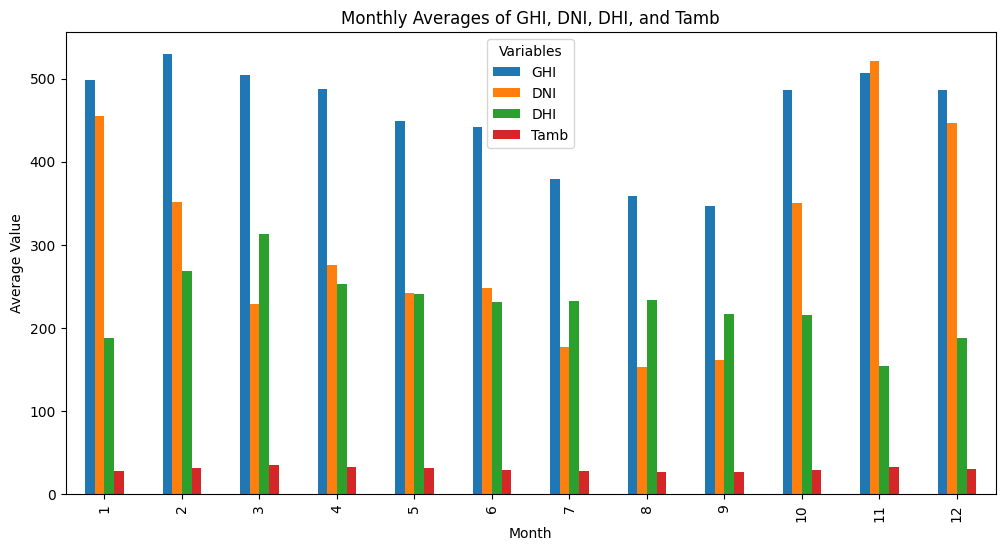

In [97]:
monthly_data = togo_df_capped.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_data.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(title="Variables")
plt.show()


Hourly Pattern of GHI, DNI, DHI & Tamb

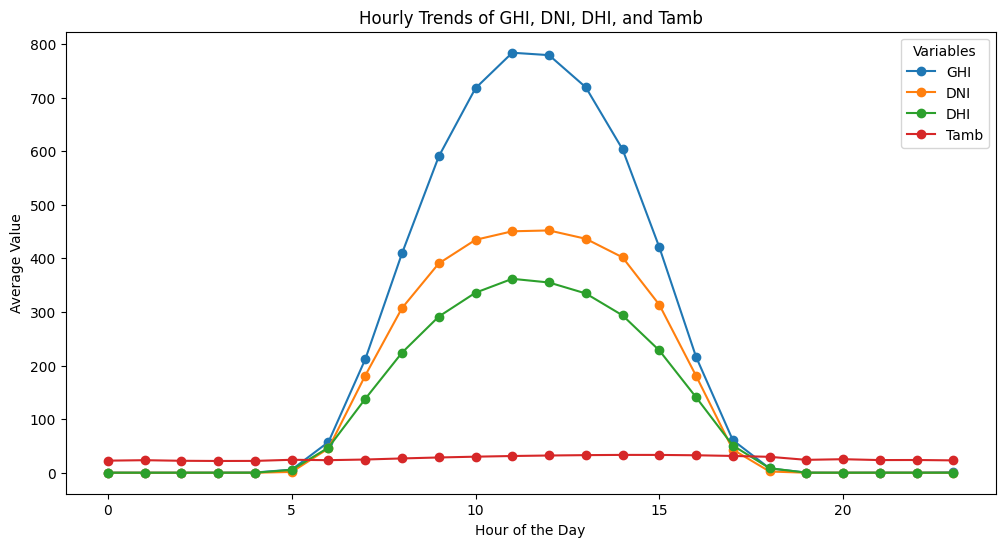

In [98]:
hourly_data = togo_df_capped.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Hourly Trends of GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.legend(title="Variables")
plt.show()


Effect of cleaning on ModA

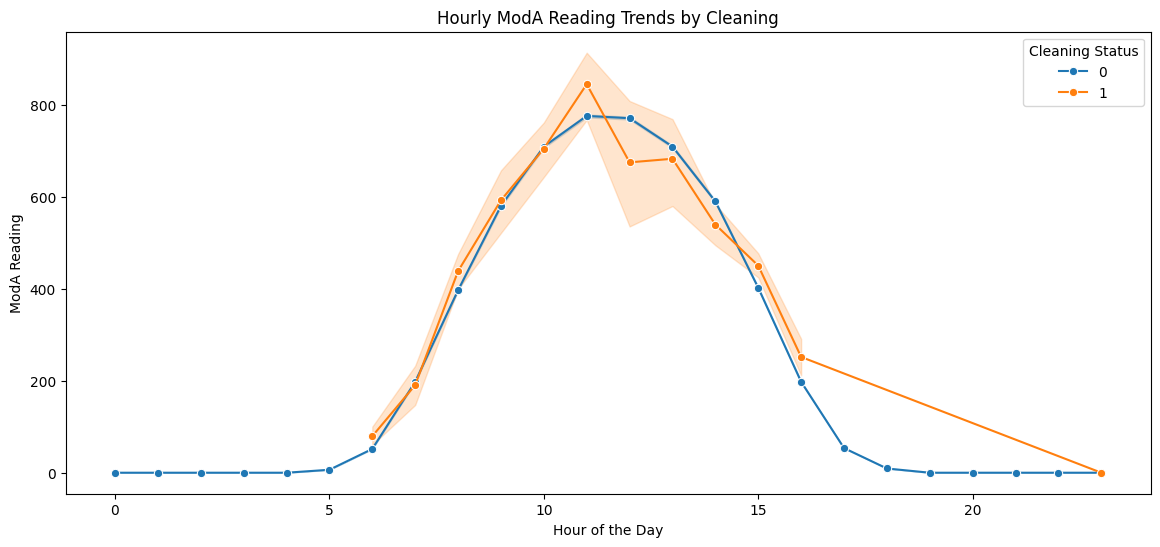

In [100]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=togo_df_capped, x='Hour', y='ModA', hue='Cleaning', marker='o')
plt.title('Hourly ModA Reading Trends by Cleaning')
plt.xlabel('Hour of the Day')
plt.ylabel('ModA Reading')
plt.legend(title="Cleaning Status")
plt.show()

Effect of cleaning on ModB

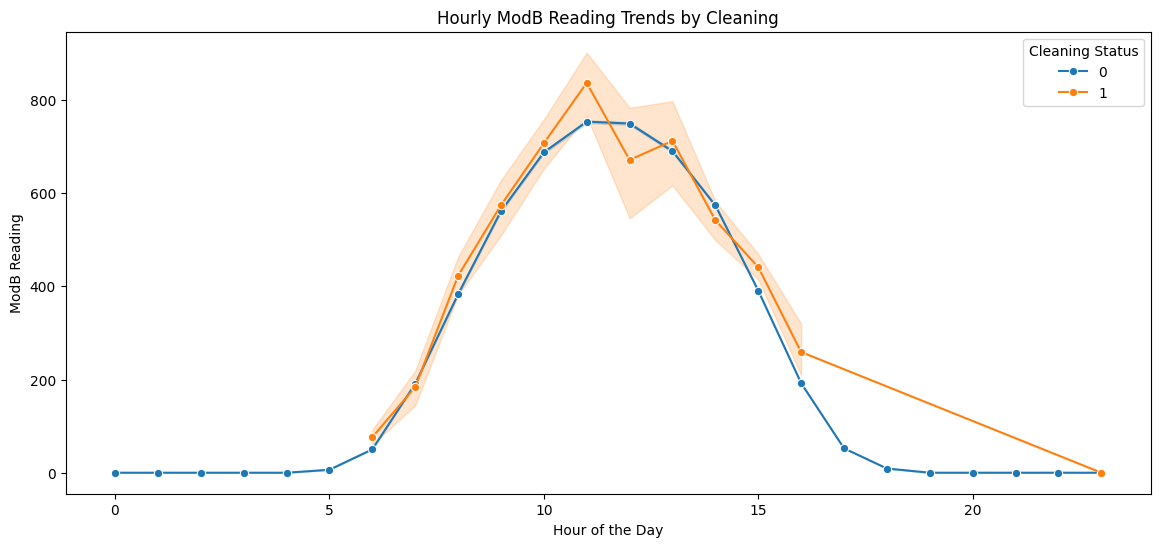

In [101]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=togo_df_capped, x='Hour', y='ModB', hue='Cleaning', marker='o')
plt.title('Hourly ModB Reading Trends by Cleaning')
plt.xlabel('Hour of the Day')
plt.ylabel('ModB Reading')
plt.legend(title="Cleaning Status")
plt.show()

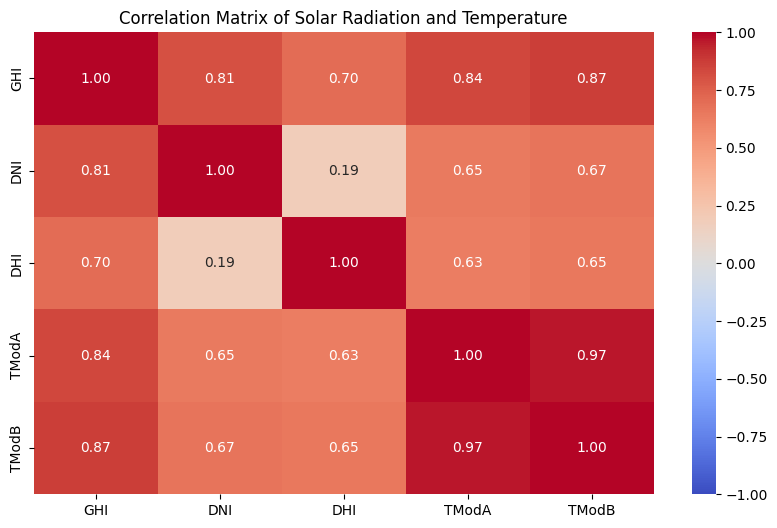

In [102]:
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

corr_matrix = togo_df_capped[correlation_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Solar Radiation and Temperature')
plt.show()

Wind Analysis

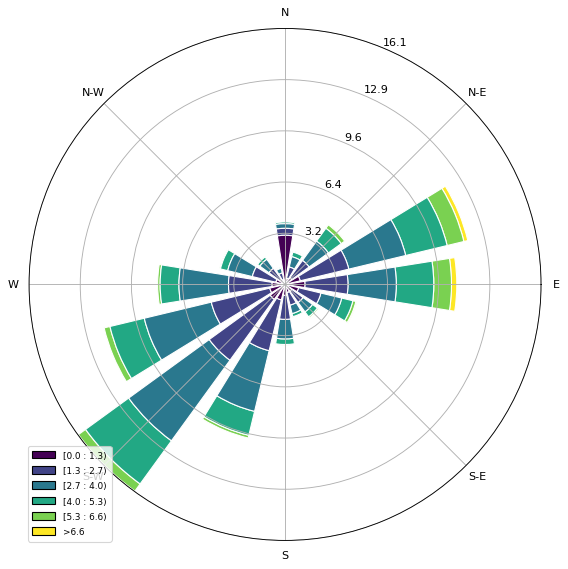

In [104]:
ax = WindroseAxes.from_ax()
ax.bar(togo_df_capped['WD'], togo_df_capped['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

The wind most frequently comes from the South-West (SW) direction, as this section has the highest bar concentrations.

Tempreture analysis

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.571787 -0.322496 -0.434984 -0.105655
Tamb -0.571787  1.000000  0.471464  0.404206  0.320020
GHI  -0.322496  0.471464  1.000000  0.805715  0.695370
DNI  -0.434984  0.404206  0.805715  1.000000  0.185431
DHI  -0.105655  0.320020  0.695370  0.185431  1.000000


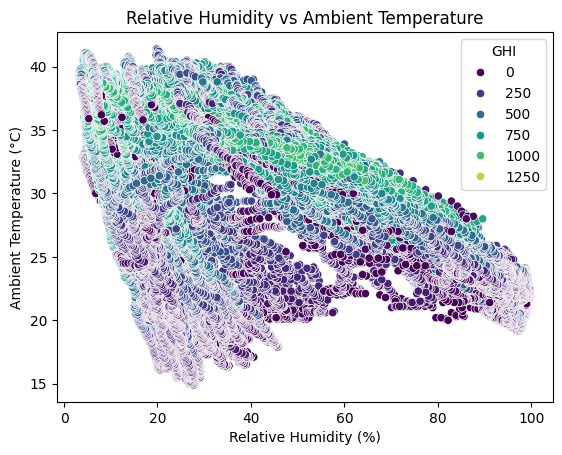

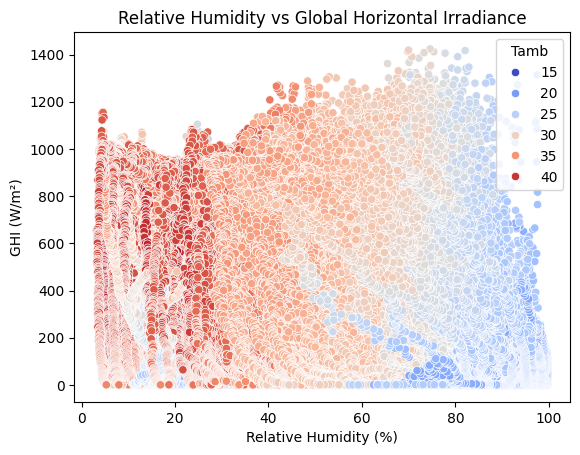

In [105]:
correlation = togo_df_capped[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()
print(correlation)

sns.scatterplot(x=togo_df_capped['RH'], y=togo_df_capped['Tamb'], hue=togo_df_capped['GHI'], palette='viridis')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

sns.scatterplot(x=togo_df_capped['RH'], y=togo_df_capped['GHI'], hue=togo_df_capped['Tamb'], palette='coolwarm')
plt.title('Relative Humidity vs Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()

Relative Humidity vs Ambient Temperature shows a clear negative correlation between RH and temperature. As RH increases, the temperature tends to decrease. This is because higher humidity levels can lead to increased evaporation, which has a cooling effect.
Relative Humidity vs Global Horizontal Irradiance shows a more complex relationship. While there is a general trend of decreasing GHI with increasing RH, there is also a significant amount of variability. This suggests that other factors, such as cloud cover and atmospheric conditions, play a role in influencing solar radiation in addition to RH.

In [106]:
def calculate_z_scores(df, threshold=3):
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        z_scores = (df[column] - mean) / std_dev
        df[f'{column}_outlier'] = np.abs(z_scores) > threshold
    return df

df_with_flags = calculate_z_scores(togo_df_capped)

print(df_with_flags.head())

              Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
342 2021-10-25 05:43:00  0.0  0.0  0.6   1.2   1.2  25.2  92.7  1.8     2.1   
343 2021-10-25 05:44:00  0.2  0.0  0.7   1.4   1.4  25.2  92.7  1.4     1.9   
344 2021-10-25 05:45:00  0.5  0.0  0.8   1.6   1.6  25.2  92.8  1.5     1.9   
345 2021-10-25 05:46:00  0.8  0.0  0.9   1.9   1.9  25.2  92.6  1.6     2.1   
346 2021-10-25 05:47:00  1.0  0.0  1.0   2.1   2.1  25.1  92.5  1.6     1.9   

     ...  WSstdev_outlier  WD_outlier  WDstdev_outlier  BP_outlier  \
342  ...            False       False            False       False   
343  ...            False       False            False       False   
344  ...            False       False            False       False   
345  ...            False       False            False       False   
346  ...            False       False            False       False   

     Cleaning_outlier  Precipitation_outlier  TModA_outlier  TModB_outlier  \
342             False     

Bubble Chart

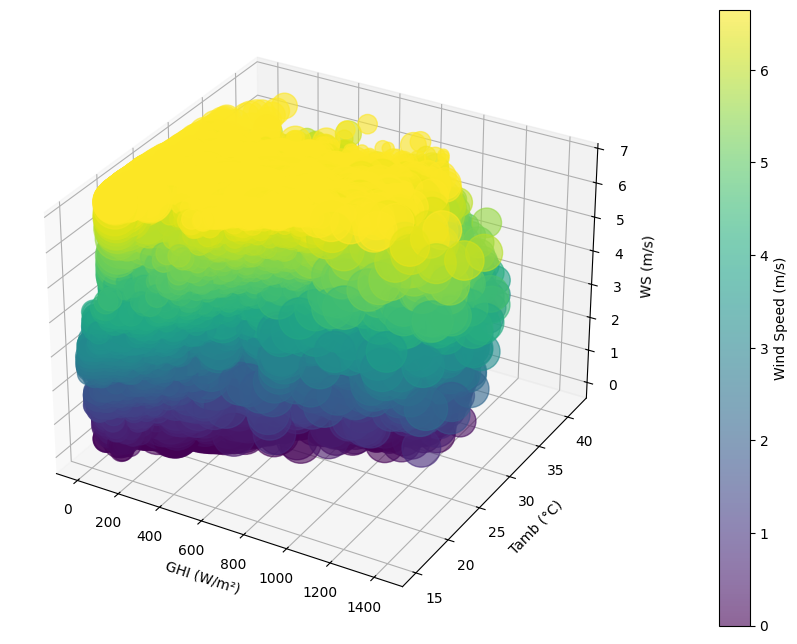

In [111]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    togo_df_capped['GHI'], togo_df_capped['Tamb'], togo_df_capped['WS'],
    s=togo_df_capped['RH']*10,  
    c=togo_df_capped['WS'],     
    cmap='viridis', 
    alpha=0.6       
)

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Wind Speed (m/s)')

ax.set_xlabel('GHI (W/m²)')
ax.set_ylabel('Tamb (°C)')
ax.set_zlabel('WS (m/s)')

plt.show()
